In [1]:
import time

import torch
from diffusers import StableDiffusionPipeline
from huggingface_hub import login
from torch.amp.autocast_mode import autocast

DEVICE = 'cuda'

# モデルダウンロード先ディレクトリ
CACHE_DIR = 'cache/diffusers'
#model_path="/mnt/e/Download/aamAnyloraAnimeMixAnime_v1.safetensors"
model_path="/mnt/e/Download/realisticVisionV60B1_v51HyperVAE.safetensors"
# Hugging Face Hubにログイン
#login(token='Hugging Face Token Id')

if DEVICE == 'cuda':
    # VRAMフラグメント対策
    torch.cuda.memory._set_allocator_settings('max_split_size_mb:100')

pipe = StableDiffusionPipeline.from_single_file(model_path,
    torch_dtype=torch.float16,
    cache_dir=CACHE_DIR,
    load_safety_checker=False)
pipe = pipe.to(DEVICE)


/home/sylx/project/anothergame/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sylx/project/anothergame/.venv/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or 

In [2]:
prompt = """
masterpiece,high quality,no background,simple background
1 boy,body shot,extremely detailed face
looking at viewer,
18 years old,asian,
very short red hair,white T-shirt,foolish,sports,big eye,small nose
very angry,screaming
"""

#fullbody,standing,
#madly smiling,sharp teeth,sharp nails,

negative_prompt = """
flat color, flat shading, nsfw,(worst quality, low quality:1.4), interlocked fingers, zombie, sketch, comic
"""

result = pipe(prompt=prompt, negative_prompt=negative_prompt, guidance_scale=7.5)

100%|██████████| 50/50 [00:08<00:00,  5.91it/s]


StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=512x512 at 0x7F654530FD00>], nsfw_content_detected=None)

In [4]:
from PIL import Image
pilImage = result.images[0]
# to webp
pilImage.save("result.webp", "WEBP")


In [ ]:
# jupyter notebook上で画像を表示
from PIL import Image
import matplotlib.pyplot as plt

plt.imshow(image)

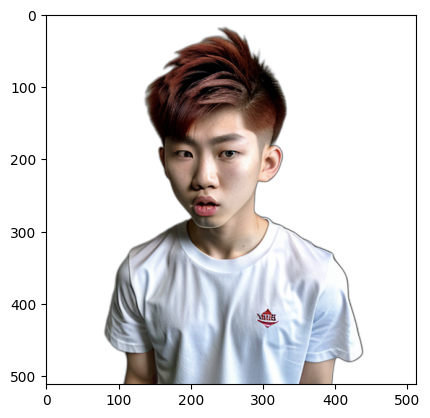

In [52]:
from rembg import remove

output = remove(image)
plt.imshow(output)